# 十六.图像的灰度非线性变换之对数变换、伽马变换

本节主要讲解非线性变换，使用自定义方法对图像进行灰度化处理，包括对数变换和伽马变换。本文主要讲解灰度线性变换，基础性知识希望对您有所帮助。

1.图像灰度非线性变换：DB=DA×DA/255

2.图像灰度对数变换

3.图像灰度伽玛变换


## 16.1.图像灰度非线性变换：DB=DA×DA/255

图像的灰度非线性变换主要包括对数变换
、幂次变换、指数变换、分段函数变换，
通过非线性关系对图像进行灰度处理，下
面主要讲解三种常见类型的灰度非线性变换。
原始图像的灰度值按照DB=DA×DA/255的公
式进行非线性变换，其代码如下：



In [1]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像灰度转换
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#获取图像高度和宽度
height = grayImage.shape[0]
width = grayImage.shape[1]

#创建一幅图像
result = np.zeros((height, width), np.uint8)

#图像灰度非线性变换：DB=DA×DA/255
for i in range(height):
    for j in range(width):
        gray = int(grayImage[i,j])*int(grayImage[i,j]) / 255
        result[i,j] = np.uint8(gray)

#显示图像
cv2.imshow("Gray Image", grayImage)
cv2.imshow("Result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()



图像灰度非线性变换的输出结果上图所示：	

## 16.2.图像灰度对数变换

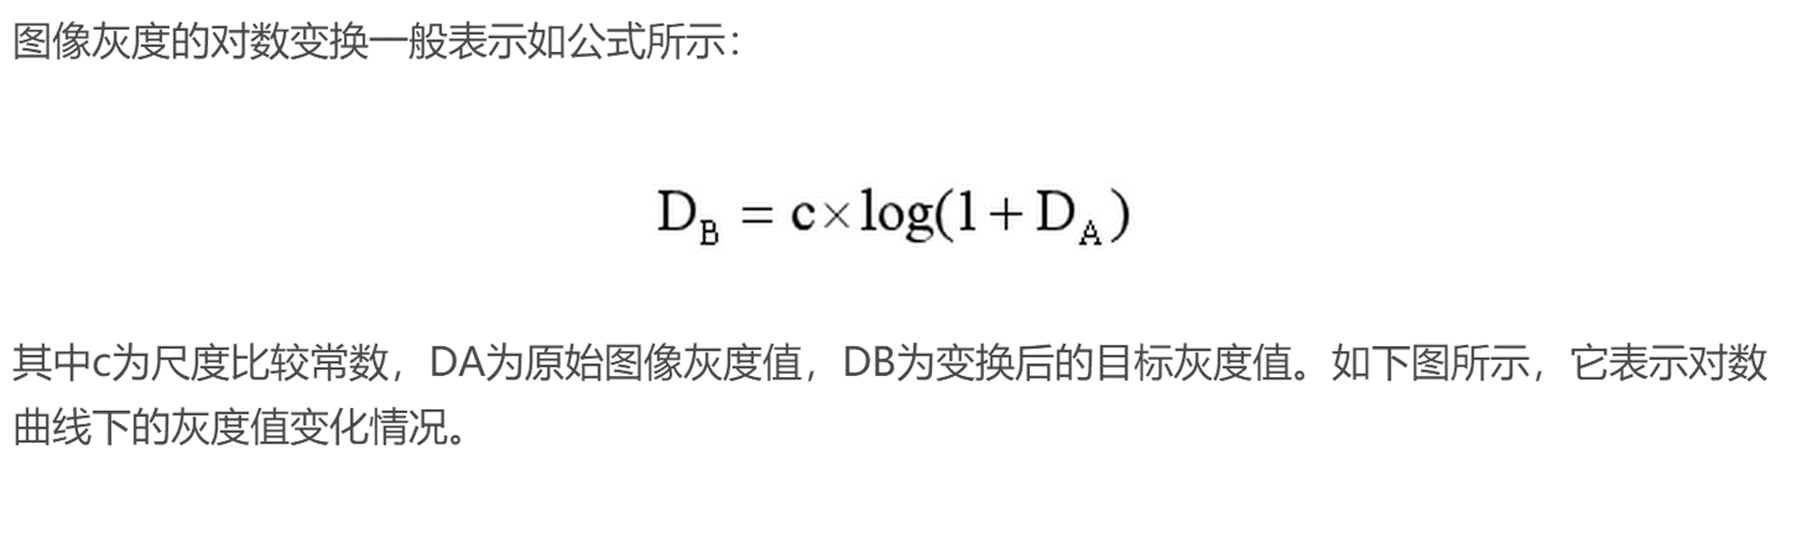

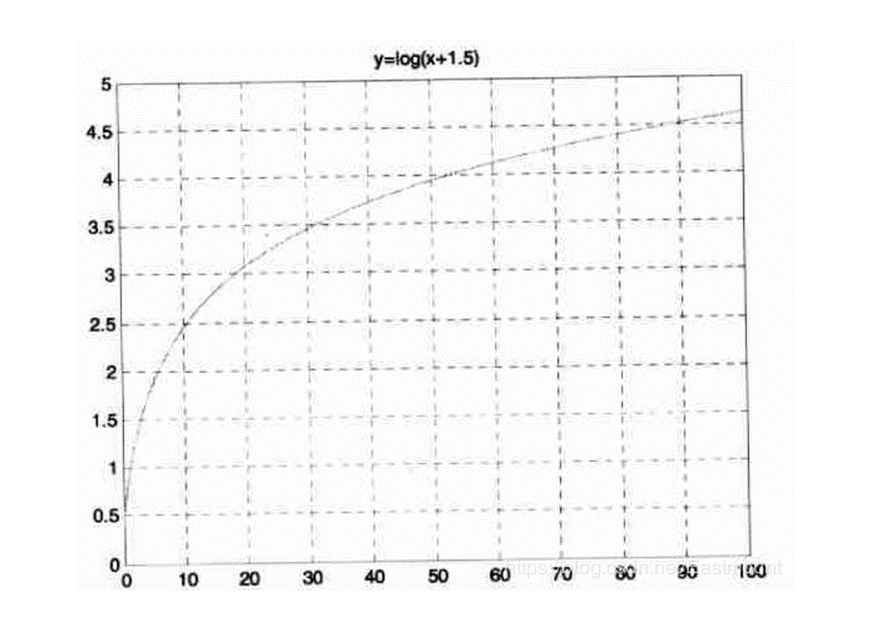


	由于对数曲线在像素值较低的区域斜率大，在像素值较高的区域斜率较小，所以图像经过对数变换后，较暗区域的对比度将有所提升。这种变换可用于增强图像的暗部细节，从而用来扩展被压缩的高值图像中的较暗像素。对数变换实现了扩展低灰度值而压缩高灰度值的效果，被广泛地应用于频谱图像的显示中
    
    一个典型的应用是傅立叶频谱，其动态范围可能宽达0～106直接显示频谱时，图像显示设备的动态范围往往不能满足要求，从而丢失大量的暗部细节；而在使用对数变换之后，图像的动态范围被合理地非线性压缩，从而可以清晰地显示。在下图中，未经变换的频谱经过对数变换后，增加了低灰度区域的对比度，从而增强暗部的细节。

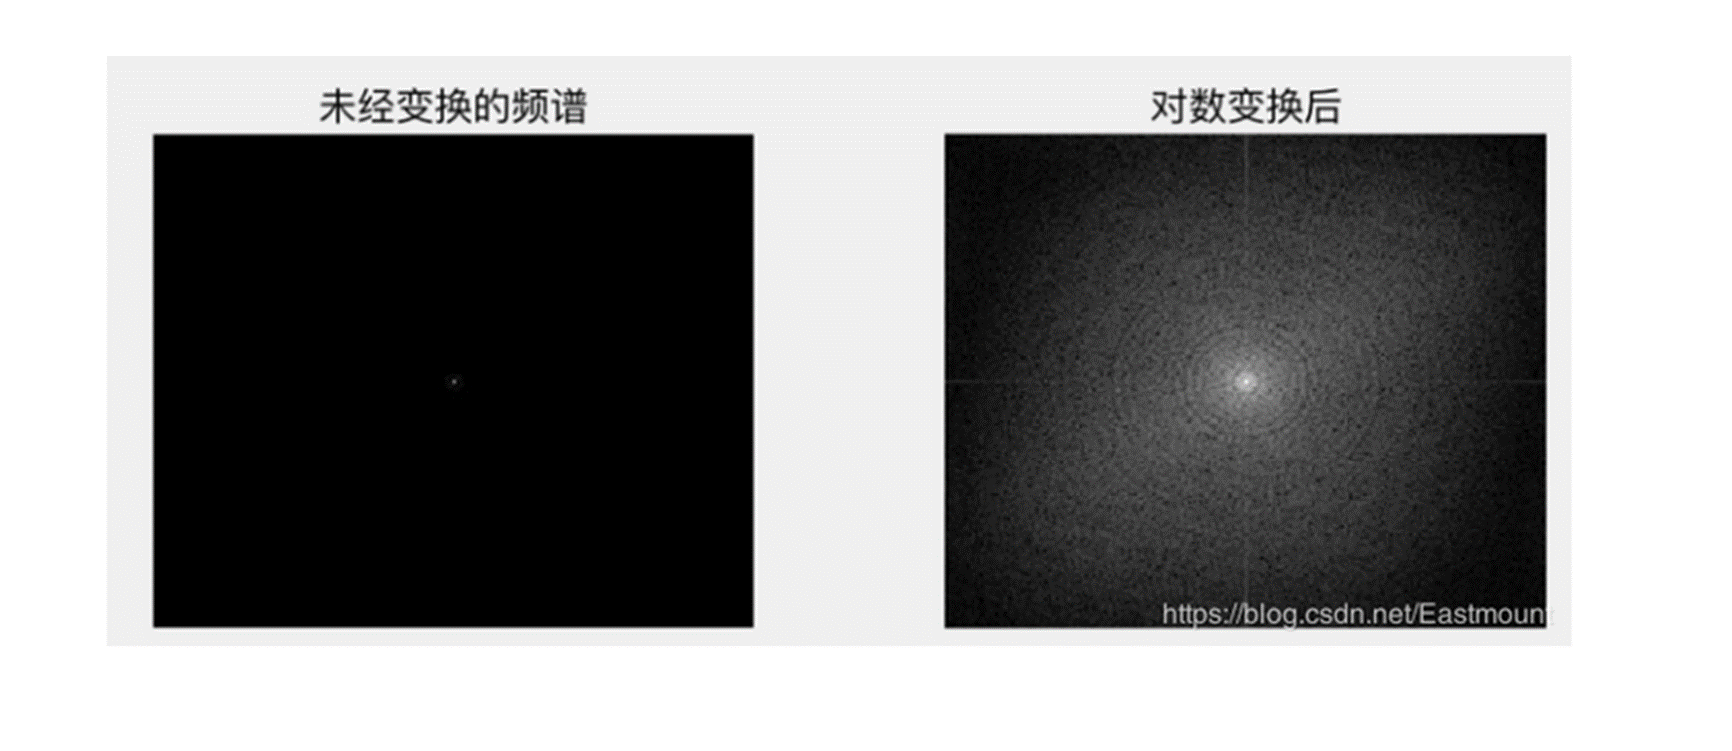

下面的代码实现了图像灰度的对数变换。


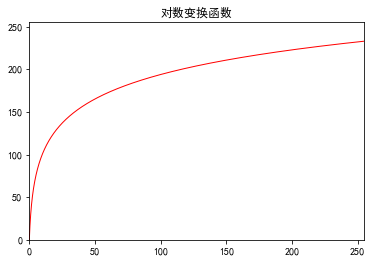

In [2]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import cv2

#绘制曲线
def log_plot(c):
    x = np.arange(0, 256, 0.01)
    y = c * np.log(1 + x)
    plt.plot(x, y, 'r', linewidth=1)
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
    plt.title(u'对数变换函数')
    plt.xlim(0, 255), plt.ylim(0, 255)
    plt.show()

#对数变换
def log(c, img):
    output = c * np.log(1.0 + img)
    output = np.uint8(output + 0.5)
    return output

#读取原始图像
img = cv2.imread('test.jpg')

#绘制对数变换曲线
log_plot(42)

#图像灰度对数变换
output = log(42, img)

#显示图像
cv2.imshow('Input', img)
cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


上图表示经过对数函数处理后的效果图，
对数变换对于整体对比度偏低并且灰度值
偏低的图像增强效果较好。


## 16.3.图像灰度伽玛变换

	伽玛变换又称为指数变换或幂次变换，是另一种常用的灰度非线性变换。图像灰度的伽玛变换一般表示如公式所示：当γ>1时，会拉伸图像中灰度级较高的区域，压缩灰度级较低的部分。当γ<1时，会拉伸图像中灰度级较低的区域，压缩灰度级较高的部分。当γ=1时，该灰度变换是线性的，此时通过线性方式改变原图像。Python实现图像灰度的伽玛变换代码如下，主要调用幂函数实现。


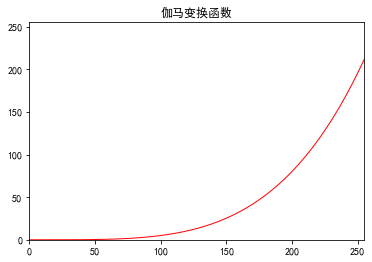

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import cv2

#绘制曲线
def gamma_plot(c, v):
    x = np.arange(0, 256, 0.01)
    y = c*x**v
    plt.plot(x, y, 'r', linewidth=1)
    plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签
    plt.title(u'伽马变换函数')
    plt.xlim([0, 255]), plt.ylim([0, 255])
    plt.show()

#伽玛变换
def gamma(img, c, v):
    lut = np.zeros(256, dtype=np.float32)
    for i in range(256):
        lut[i] = c * i ** v
    output_img = cv2.LUT(img, lut) #像素灰度值的映射
    output_img = np.uint8(output_img+0.5)  
    return output_img

#读取原始图像
img = cv2.imread('test.jpg')

#绘制伽玛变换曲线
gamma_plot(0.00000005, 4.0)

#图像灰度伽玛变换
output = gamma(img, 0.00000005, 4.0)

#显示图像
cv2.imshow('Input', img)
cv2.imshow('Output', output)
cv2.waitKey(0)
cv2.destroyAllWindows()



上图表示经过伽玛变换处理后的效果图，伽马变换对于图像对比度偏低，并且整体亮度值偏高（或由于相机过曝）情况下的图像增强效果明显。
